In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess import PointProcessTrain
from PointProcess import PointProcessRun
from numpy import array

In [2]:
fields = ['XCOORD', 'YCOORD', 'CALL_TYPE_FINAL_D', 'CALL_TYPE_FINAL', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)
full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')

In [18]:
end = len(full_data)- 10000
start = end-600000
data = full_data[start:end]
data.reset_index(drop=True, inplace=True)

# For use when model parameters are updated with weighted theta
#all_events = PointProcessTrain(data, xgridsize = 100, ygridsize = 100, w = [.003, .002, .001], update_with_trends = True) 

# For use when model parameters are updated *correctly*
all_events = PointProcessTrain(data, w = [.05, .01, .005]) 

#training_points = full_data[end:end+2200]

training_points = full_data[end:end+500]

training_points.reset_index(drop=True, inplace=True)
training_points.to_csv('TestTrainPoints.csv')
test_points = full_data[end+500:end+500+2000]
test_points.reset_index(drop=True, inplace=True)

#print(data.DATE_TIME[0], data.DATE_TIME[len(data)-1], training_points.DATE_TIME[0], training_points.DATE_TIME[len(training_points) - 1])
#print(data.DATE_TIME[0].weekday(), data.DATE_TIME[len(data)-1].weekday(), training_points.DATE_TIME[0].weekday(), training_points.DATE_TIME[len(training_points) - 1].weekday())


In [5]:
# load in data with correct column labels and format
fields = ['XCOORD', 'YCOORD', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)
full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')

# initialize PointProcessTrain class. Can specify init values or leave as default
all_events = PointProcessTrain(data, w = [.05, .01, .005]) 

# train the parameters
import time
start = time.time()
all_events.train(progress_bar = True)
end = time.time()
print(start - end)


0.16666666666666669 percent trained

0.33333333333333337 percent trained

0.5 percent trained

0.6666666666666667 percent trained

0.8333333333333334 percent trained

1.0 percent trained

1.1666666666666667 percent trained

1.3333333333333335 percent trained

1.5 percent trained

1.6666666666666667 percent trained

1.8333333333333333 percent trained

2.0 percent trained

2.166666666666667 percent trained

2.3333333333333335 percent trained

2.5 percent trained

2.666666666666667 percent trained

2.833333333333333 percent trained

3.0 percent trained

3.166666666666667 percent trained

3.3333333333333335 percent trained

3.5000000000000004 percent trained

3.6666666666666665 percent trained

3.833333333333333 percent trained

4.0 percent trained

4.166666666666666 percent trained

4.333333333333334 percent trained

4.5 percent trained

4.666666666666667 percent trained

4.833333333333333 percent trained

5.0 percent trained

5.166666666666667 percent trained

5.333333333333334 percent t

43.5 percent trained

43.666666666666664 percent trained

43.833333333333336 percent trained

44.0 percent trained

44.166666666666664 percent trained

44.333333333333336 percent trained

44.5 percent trained

44.666666666666664 percent trained

44.83333333333333 percent trained

45.0 percent trained

45.166666666666664 percent trained

45.33333333333333 percent trained

45.5 percent trained

45.666666666666664 percent trained

45.83333333333333 percent trained

46.0 percent trained

46.166666666666664 percent trained

46.33333333333333 percent trained

46.5 percent trained

46.666666666666664 percent trained

46.833333333333336 percent trained

47.0 percent trained

47.16666666666667 percent trained

47.333333333333336 percent trained

47.5 percent trained

47.66666666666667 percent trained

47.833333333333336 percent trained

48.0 percent trained

48.16666666666667 percent trained

48.333333333333336 percent trained

48.5 percent trained

48.66666666666667 percent trained

48.8333333

87.33333333333333 percent trained

87.5 percent trained

87.66666666666667 percent trained

87.83333333333333 percent trained

88.0 percent trained

88.16666666666667 percent trained

88.33333333333333 percent trained

88.5 percent trained

88.66666666666667 percent trained

88.83333333333333 percent trained

89.0 percent trained

89.16666666666667 percent trained

89.33333333333333 percent trained

89.5 percent trained

89.66666666666666 percent trained

89.83333333333333 percent trained

90.0 percent trained

90.16666666666666 percent trained

90.33333333333333 percent trained

90.5 percent trained

90.66666666666666 percent trained

90.83333333333333 percent trained

91.0 percent trained

91.16666666666666 percent trained

91.33333333333333 percent trained

91.5 percent trained

91.66666666666666 percent trained

91.83333333333333 percent trained

92.0 percent trained

92.16666666666666 percent trained

92.33333333333333 percent trained

92.5 percent trained

92.66666666666666 perce

In [6]:
full_data.DATE_TIME[len(full_data)-1] - full_data.DATE_TIME[0]

Timedelta('3595 days 19:12:15')

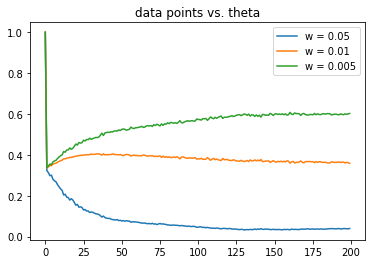


Hour vector: 
[0.0123684  0.00675913 0.00908814 0.00841652 0.00817007 0.00706097
 0.00556714 0.00645889 0.00767912 0.0073796  0.00584896 0.00789775
 0.00386457 0.00625603 0.0050589  0.00439636 0.00430528 0.0048959
 0.00517556 0.00493053 0.00395922 0.0041722  0.00823995 0.00428418
 0.00542545 0.00539053 0.00679002 0.00541223 0.0059344  0.00403839
 0.0086089  0.00767715 0.00978686 0.00954494 0.0129853  0.00922517
 0.00977547 0.01165426 0.00905576 0.01123397 0.01394858 0.01249125
 0.0132004  0.00953355 0.01088561 0.014009   0.01559771 0.01404596
 0.01034939 0.01322148 0.01367688 0.0150221  0.01308881 0.01188825
 0.01415315 0.012338   0.01407355 0.01389944 0.01264617 0.01177575
 0.01166091 0.01428618 0.01679862 0.01246639 0.0145171  0.01217322
 0.0152094  0.0128173  0.01312333 0.01568836 0.01509867 0.0141802
 0.01391088 0.01436182 0.01126253 0.01396603 0.01244584 0.01332519
 0.01261977 0.01318138 0.01007779 0.01094133 0.01460362 0.01048721
 0.01201495 0.01178888 0.01379518 0.01024156 0.01

In [9]:
all_events.param_examine()

In [10]:
all_events.model_hotspot_examine(500)

Location and value of largest and smallest sum(Lambda): 
14.936405121684523 (40, 46) 0.022212298914755964 (0, 0)

Location of grid with most events:
5.0 (40, 48)

Historical time period is 1.5403043762 days

Trained hotspots in real top 10
Grid: (40, 46), Model: 4.417258816949673, Real: 4
Grid: (40, 48), Model: 2.987231736804721, Real: 5

Trained hotstpots not in real top 10
Grid: (39, 46), Model: 2.6891468856100547, Real: 2
Grid: (38, 44), Model: 2.549194546335808, Real: 1
Grid: (38, 53), Model: 2.371178607926826, Real: 0
Grid: (38, 46), Model: 2.2042465030102703, Real: 1
Grid: (38, 45), Model: 2.173949593143358, Real: 3
Grid: (38, 47), Model: 2.051571865154057, Real: 3
Grid: (39, 64), Model: 1.9802963607564044, Real: 3
Grid: (64, 65), Model: 1.8314257462223793, Real: 0

Real top 10 hotspots not in trained model
Grid: (38, 65), Model: 0.9791254786522975, Real: 4
Grid: (40, 14), Model: 0.4420280831449162, Real: 4
Grid: (25, 52), Model: 0.8280669795571358, Real: 3
Grid: (27, 45), Model:

In [12]:
all_events_simulate = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
points_to_run = test_points[0:300]
points_to_run.reset_index(drop = True, inplace = True)
all_events_simulate.test_projection(points_to_run, num_hotspots = 30, top_percent = 0)



Predicting over time of 1.0080925359 days. Generating 97 intensity prediction(s)
29.0

The predictive accuracy index for 30 hotspots is: 32.22222222222222. 
Hit number/Tot number: 0.09666666666666666. Hit area/Tot area: 0.003

The predicted number of events is: 303.40666752555103

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.3651852797896122, Real: 3.0
Grid: (38, 44), Model: 1.3540993733042321, Real: 5.0
Grid: (38, 45), Model: 1.1692460215956875, Real: 2.0
Grid: (38, 47), Model: 1.110697802514896, Real: 3.0
Grid: (42, 41), Model: 0.7087171352399577, Real: 2.0
Grid: (10, 66), Model: 0.7010655858981778, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 1.6071048551719052, Real: 1.0
Grid: (39, 46), Model: 1.433685537718783, Real: 1.0
Grid: (38, 53), Model: 1.2577961458954718, Real: 0.0
Grid: (38, 46), Model: 1.1766911420674222, Real: 0.0
Grid: (39, 64), Model: 1.0700778241329818, Real: 0.0
Grid: (48, 50), Model: 0.9678419575432512, Real: 1.0
Grid: (64

(array([[[ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07, -1.27210882e-07],
         [ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07,  2.55245467e-07],
         [ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07,  2.55245467e-07],
         ...,
         [ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07,  2.55245467e-07],
         [ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07,  2.55245467e-07],
         [ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07,  2.55245467e-07]],
 
        [[ 2.50442996e-07,  2.50442996e-07,  2.50442996e-07, ...,
           2.50442996e-07,  2.50442996e-07, -1.24817395e-07],
         [ 2.50442996e-07,  2.50442996e-07,  2.50442996e-07, ...,
           2.50442996

In [16]:
# get a array([10, _xsize, _ysize]) of intensities:
all_events_simulate.get_future_events(timestamp, 10, top_percent = 0)

# get intensities in API friendly format:
all_events_simulate.get_events_for_api(timestamp, 10, top_percent = 0)

([[[39.6277, -86.3283, 1.6849001335009798e-07],
   [39.6307303030303, -86.3283, 1.6849001335009798e-07],
   [39.633760606060605, -86.3283, 1.6849001335009798e-07],
   [39.636790909090905, -86.3283, 1.6849001335009798e-07],
   [39.63982121212121, -86.3283, 1.6849001335009798e-07],
   [39.64285151515151, -86.3283, 1.6849001335009798e-07],
   [39.64588181818181, -86.3283, 1.6849001335009798e-07],
   [39.64891212121212, -86.3283, 1.6849001335009798e-07],
   [39.65194242424242, -86.3283, 1.6849001335009798e-07],
   [39.65497272727273, -86.3283, 1.6849001335009798e-07],
   [39.65800303030303, -86.3283, 1.6849001335009798e-07],
   [39.66103333333333, -86.3283, 1.6849001335009798e-07],
   [39.664063636363636, -86.3283, 1.6849001335009798e-07],
   [39.667093939393936, -86.3283, 1.6849001335009798e-07],
   [39.670124242424244, -86.3283, 1.6849001335009798e-07],
   [39.673154545454544, -86.3283, 1.6849001335009798e-07],
   [39.676184848484844, -86.3283, 1.6849001335009798e-07],
   [39.67921515151

In [14]:
timestamp = all_events_simulate._LastTime

In [12]:
all_events_simulate.update_from_new_inputs('TestTrainPoints.csv')

'Parameters updated: 500 used for update ranging from: 2016-09-29 00:54:49 to 2016-09-30 21:01:17.'

In [13]:
all_events_simulate._LastTime

Timestamp('2016-09-30 21:01:17')

In [15]:
points_to_run = test_points[0:20]
points_to_run.reset_index(drop = True, inplace = True)
all_events_simulate.test_projection(points_to_run, num_hotspots = 30, top_percent = 0)


Predicting over time of 0.0710302517 days. Generating 7 intensity prediction(s)
4.0

The predictive accuracy index for 30 hotspots is: 66.66666666666667. 
Hit number/Tot number: 0.2. Hit area/Tot area: 0.003

The predicted number of events is: 25.087763803869066

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.19913574530717065, Real: 1.0
Grid: (38, 44), Model: 0.11109412863609515, Real: 2.0
Grid: (39, 47), Model: 0.06504402932306969, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.13165195476695132, Real: 0.0
Grid: (39, 46), Model: 0.12179354672311563, Real: 0.0
Grid: (38, 53), Model: 0.10388493693523536, Real: 0.0
Grid: (38, 45), Model: 0.09744592628416188, Real: 0.0
Grid: (38, 46), Model: 0.09658830814762048, Real: 0.0
Grid: (38, 47), Model: 0.09190718889765186, Real: 0.0
Grid: (39, 64), Model: 0.08934727352174925, Real: 0.0
Grid: (64, 65), Model: 0.08099369133544525, Real: 0.0
Grid: (48, 50), Model: 0.07955805682598749, Real: 0.0
Grid: (41, 46

(array([[[ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07, -1.33759880e-07],
         [ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07,  2.67726002e-07],
         [ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07,  2.67726002e-07],
         ...,
         [ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07,  2.67726002e-07],
         [ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07,  2.67726002e-07],
         [ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07,  2.67726002e-07]],
 
        [[ 2.62019871e-07,  2.62019871e-07,  2.62019871e-07, ...,
           2.62019871e-07,  2.62019871e-07, -1.30909012e-07],
         [ 2.62019871e-07,  2.62019871e-07,  2.62019871e-07, ...,
           2.62019871

In [ ]:
# Get intensities in Wasserstein-friendly format. Wasserstein works best when only top intensities are used
wasserstein_locs = all_events_simulate.locs_for_wasserstein(all_events_simulate._LastTime, 10, top_percent = 96)


In [ ]:
for i in range(0, len(wasserstein_locs)):
    plt.plot(wasserstein_locs[i][1], wasserstein_locs[i][0], '.')
plt.show()

#### Lets get results

In [35]:
simulation = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
simulation._LastTime

Timestamp('2016-09-29 00:49:24')

In [36]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600: # 1 hour in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_1h = []
real_num_1h = []
pai_1h = []
for i in range(0, 20):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_1h.append(sum(sum(pred)))
    real_num_1h.append(sum(sum(real)))
    pai_1h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs('for_results.csv')


Predicting over time of 0.0357292467 days. Generating 4 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 55.55555555555555. 
Hit number/Tot number: 0.16666666666666666. Hit area/Tot area: 0.003

The predicted number of events is: 7.870533704837396

Predicted hotspots in real top 30
Grid: (64, 65), Model: 0.02509683765500107, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.06135419044870436, Real: 0.0
Grid: (40, 48), Model: 0.0416891725979393, Real: 0.0
Grid: (39, 46), Model: 0.03719058133685653, Real: 0.0
Grid: (38, 44), Model: 0.035126073016812115, Real: 0.0
Grid: (38, 53), Model: 0.032627915005365514, Real: 0.0
Grid: (38, 46), Model: 0.030524007166208105, Real: 0.0
Grid: (38, 45), Model: 0.030330876698485536, Real: 0.0
Grid: (38, 47), Model: 0.0288121041039618, Real: 0.0
Grid: (39, 64), Model: 0.02775839980816648, Real: 0.0
Grid: (48, 50), Model: 0.025106345914954097, Real: 0.0
Grid: (41, 46), Model: 0.02373766364617686, Real:


Predicting over time of 0.0382639746 days. Generating 4 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 39.2156862745098. 
Hit number/Tot number: 0.11764705882352941. Hit area/Tot area: 0.003

The predicted number of events is: 15.510001236567293

Predicted hotspots in real top 30
Grid: (39, 46), Model: 0.07354340968734518, Real: 1.0
Grid: (44, 46), Model: 0.03619212331732739, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.12059581605474405, Real: 0.0
Grid: (40, 48), Model: 0.08194015155936984, Real: 0.0
Grid: (38, 44), Model: 0.06905247477661261, Real: 0.0
Grid: (38, 53), Model: 0.06457586283812823, Real: 0.0
Grid: (38, 46), Model: 0.0604434861313467, Real: 0.0
Grid: (38, 45), Model: 0.05961932937795776, Real: 0.0
Grid: (38, 47), Model: 0.05663175719922637, Real: 0.0
Grid: (39, 64), Model: 0.05500650723709831, Real: 0.0
Grid: (64, 65), Model: 0.05067345190021055, Real: 0.0
Grid: (48, 50), Model: 0.049346293915493986, Real: 0.


Predicting over time of 0.0400000896 days. Generating 4 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 41.666666666666664. 
Hit number/Tot number: 0.125. Hit area/Tot area: 0.003

The predicted number of events is: 13.742590857960778

Predicted hotspots in real top 30
Grid: (41, 46), Model: 0.04122996407235714, Real: 1.0
Grid: (10, 66), Model: 0.03196077417988701, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.10692499683298513, Real: 0.0
Grid: (40, 48), Model: 0.07238021088617913, Real: 0.0
Grid: (39, 46), Model: 0.06535446970470994, Real: 0.0
Grid: (38, 44), Model: 0.06100326939746795, Real: 0.0
Grid: (38, 53), Model: 0.05743515031011156, Real: 0.0
Grid: (38, 46), Model: 0.053392360259551554, Real: 0.0
Grid: (38, 45), Model: 0.052665862455614026, Real: 0.0
Grid: (38, 47), Model: 0.05042185729444573, Real: 0.0
Grid: (39, 64), Model: 0.048589962876562656, Real: 0.0
Grid: (64, 65), Model: 0.04476431216023687, Real: 0.0
Grid: (

In [47]:
#print(pred_num_1h, real_num_1h, pai_1h)
print(np.mean(pred_num_1h), np.mean(real_num_1h), np.mean(pai_1h), 
      np.median(pred_num_1h), np.median(real_num_1h), np.median(pai_1h))

12.66387745855759 11.7 27.475090913558404 14.365052853107935 11.5 25.79365079365079


In [40]:
simulation = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
simulation._LastTime

Timestamp('2016-09-29 00:49:24')

In [41]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*2: # 2 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_2h = []
real_num_2h = []
pai_2h = []
for i in range(0, 20):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_2h.append(sum(sum(pred)))
    real_num_2h.append(sum(sum(real)))
    pai_2h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs('for_results.csv')


Predicting over time of 0.0817710165 days. Generating 8 intensity prediction(s)
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.003

The predicted number of events is: 11.182659076952838

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.08717363020866098, Real: 0.0
Grid: (40, 48), Model: 0.05923306116794418, Real: 0.0
Grid: (39, 46), Model: 0.05284134565209184, Real: 0.0
Grid: (38, 44), Model: 0.0499080385130347, Real: 0.0
Grid: (38, 53), Model: 0.046358590608987775, Real: 0.0
Grid: (38, 46), Model: 0.04336930360801025, Real: 0.0
Grid: (38, 45), Model: 0.043094898814268444, Real: 0.0
Grid: (38, 47), Model: 0.0409369871939244, Real: 0.0
Grid: (39, 64), Model: 0.03943985671336276, Real: 0.0
Grid: (48, 50), Model: 0.03567174953617454, Real: 0.0
Grid: (64, 65), Model: 0.035658239953030975, Real: 0.0
Grid: (41, 46), Model: 0.03372709015596007, Real: 0.0
Grid: (58, 52), Model: 0.0


Predicting over time of 0.0826969445 days. Generating 8 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 27.777777777777775. 
Hit number/Tot number: 0.08333333333333333. Hit area/Tot area: 0.003

The predicted number of events is: 31.0696841568081

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.24102651935216243, Real: 1.0
Grid: (10, 66), Model: 0.07231428247803935, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.16376535300765185, Real: 0.0
Grid: (39, 46), Model: 0.14786848686441126, Real: 0.0
Grid: (38, 44), Model: 0.1380202455174703, Real: 0.0
Grid: (38, 53), Model: 0.1299505729359586, Real: 0.0
Grid: (38, 46), Model: 0.12080237860377126, Real: 0.0
Grid: (38, 45), Model: 0.11915895967477567, Real: 0.0
Grid: (38, 47), Model: 0.11408253938844415, Real: 0.0
Grid: (39, 64), Model: 0.10993698464390812, Real: 0.0
Grid: (64, 65), Model: 0.10039275070519822, Real: 0.0
Grid: (48, 50), Model: 0.09862307468353103, Real: 0.0



Predicting over time of 0.0795256411 days. Generating 8 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 10.1010101010101. 
Hit number/Tot number: 0.030303030303030304. Hit area/Tot area: 0.003

The predicted number of events is: 27.738447219291103

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.2183275408778655, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.14562997742897163, Real: 0.0
Grid: (39, 46), Model: 0.13227387039790742, Real: 0.0
Grid: (38, 44), Model: 0.12276389554543833, Real: 0.0
Grid: (38, 53), Model: 0.1155522609860629, Real: 0.0
Grid: (38, 46), Model: 0.10742787842723739, Real: 0.0
Grid: (38, 45), Model: 0.1059723302209395, Real: 0.0
Grid: (38, 47), Model: 0.10144717457427085, Real: 0.0
Grid: (39, 64), Model: 0.09776673719657894, Real: 0.0
Grid: (64, 65), Model: 0.08929194758106285, Real: 0.0
Grid: (48, 50), Model: 0.08849399815244578, Real: 0.0
Grid: (41, 46), Model: 0.08456082077096275, Real: 0.0


In [46]:
#print(pred_num_2h, real_num_2h, pai_2h)
print(np.mean(pred_num_2h), np.mean(real_num_2h), np.mean(pai_2h), 
      np.median(pred_num_2h), np.median(real_num_2h), np.median(pai_2h))

25.04070284705474 23.8 29.81576924464988 28.246217973187505 23.5 28.381642512077292


In [43]:
simulation = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
simulation._LastTime

Timestamp('2016-09-29 00:49:24')

In [44]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*4: # 4 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_4h = []
real_num_4h = []
pai_4h = []
for i in range(0, 20):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_4h.append(sum(sum(pred)))
    real_num_4h.append(sum(sum(real)))
    pai_4h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs('for_results.csv')


Predicting over time of 0.1654286113 days. Generating 16 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 11.904761904761903. 
Hit number/Tot number: 0.03571428571428571. Hit area/Tot area: 0.003

The predicted number of events is: 32.05981210539947

Predicted hotspots in real top 30
Grid: (39, 64), Model: 0.11307099563647195, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.24992000433914616, Real: 0.0
Grid: (40, 48), Model: 0.1698165703169574, Real: 0.0
Grid: (39, 46), Model: 0.15149202004145798, Real: 0.0
Grid: (38, 44), Model: 0.14308245706735145, Real: 0.0
Grid: (38, 53), Model: 0.13290646653606752, Real: 0.0
Grid: (38, 46), Model: 0.12433641366036396, Real: 0.0
Grid: (38, 45), Model: 0.12354971650116016, Real: 0.0
Grid: (38, 47), Model: 0.11736315205238151, Real: 0.0
Grid: (48, 50), Model: 0.10226812600927951, Real: 0.0
Grid: (64, 65), Model: 0.10222939508721308, Real: 0.0
Grid: (41, 46), Model: 0.09669293911413661, Real: 0


Predicting over time of 0.16649342849999998 days. Generating 16 intensity prediction(s)
4.0

The predictive accuracy index for 30 hotspots is: 40.4040404040404. 
Hit number/Tot number: 0.12121212121212122. Hit area/Tot area: 0.003

The predicted number of events is: 24.50525633927261

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.1904299078265868, Real: 2.0
Grid: (39, 46), Model: 0.11639030902418462, Real: 1.0
Grid: (10, 66), Model: 0.05761890918520561, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.12890559402523571, Real: 0.0
Grid: (38, 44), Model: 0.1086537550127913, Real: 0.0
Grid: (38, 53), Model: 0.102288090790323, Real: 0.0
Grid: (38, 46), Model: 0.09509083533512652, Real: 0.0
Grid: (38, 45), Model: 0.09379851626324516, Real: 0.0
Grid: (38, 47), Model: 0.08979853830839447, Real: 0.0
Grid: (39, 64), Model: 0.08653900572460471, Real: 0.0
Grid: (64, 65), Model: 0.07903353653331804, Real: 0.0
Grid: (48, 50), Model: 0.07833449761235993, Real:

5.0

The predictive accuracy index for 30 hotspots is: 29.23976608187134. 
Hit number/Tot number: 0.08771929824561403. Hit area/Tot area: 0.003

The predicted number of events is: 62.07328619506444

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.49017807586400425, Real: 2.0
Grid: (40, 48), Model: 0.3245984064609471, Real: 1.0
Grid: (38, 45), Model: 0.23979287242314382, Real: 1.0
Grid: (39, 47), Model: 0.1612514608798222, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (39, 46), Model: 0.30195888901170237, Real: 0.0
Grid: (38, 44), Model: 0.2736704354179114, Real: 0.0
Grid: (38, 53), Model: 0.25755384356412614, Real: 0.0
Grid: (38, 46), Model: 0.23945666575077693, Real: 0.0
Grid: (38, 47), Model: 0.22611794531991986, Real: 0.0
Grid: (39, 64), Model: 0.22150910151872233, Real: 0.0
Grid: (64, 65), Model: 0.199055591890787, Real: 0.0
Grid: (48, 50), Model: 0.19723983287003358, Real: 0.0
Grid: (41, 46), Model: 0.18850551249919123, Real: 0.0
Grid: (58, 52), Model: 0.18682


Predicting over time of 0.15842628079999999 days. Generating 16 intensity prediction(s)
8.0

The predictive accuracy index for 30 hotspots is: 43.01075268817204. 
Hit number/Tot number: 0.12903225806451613. Hit area/Tot area: 0.003

The predicted number of events is: 65.48816637678908

Predicted hotspots in real top 30
Grid: (40, 48), Model: 0.3419311197454533, Real: 1.0
Grid: (38, 44), Model: 0.2924109713604604, Real: 1.0
Grid: (38, 45), Model: 0.2530776260334169, Real: 1.0
Grid: (38, 47), Model: 0.23875639449288455, Real: 1.0
Grid: (39, 50), Model: 0.1653897490781159, Real: 1.0
Grid: (10, 66), Model: 0.15745063158837566, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.5209081248500637, Real: 0.0
Grid: (39, 46), Model: 0.3180976815573134, Real: 0.0
Grid: (38, 53), Model: 0.2698095822210623, Real: 0.0
Grid: (38, 46), Model: 0.25088339440901786, Real: 0.0
Grid: (39, 64), Model: 0.2320481988615347, Real: 0.0
Grid: (64, 65), Model: 0.21046173932035134, Real: 0.


Predicting over time of 0.1605096188 days. Generating 16 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 7.936507936507936. 
Hit number/Tot number: 0.023809523809523808. Hit area/Tot area: 0.003

The predicted number of events is: 48.13020559205103

Predicted hotspots in real top 30
Grid: (48, 50), Model: 0.15369174433473554, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.3805721391955753, Real: 0.0
Grid: (40, 48), Model: 0.2525757936702566, Real: 0.0
Grid: (39, 46), Model: 0.23237746466074782, Real: 0.0
Grid: (38, 44), Model: 0.2246148777304654, Real: 0.0
Grid: (38, 53), Model: 0.1971538739969695, Real: 0.0
Grid: (38, 45), Model: 0.18900900241556012, Real: 0.0
Grid: (38, 46), Model: 0.18607959584298242, Real: 0.0
Grid: (38, 47), Model: 0.17717522705557318, Real: 0.0
Grid: (39, 64), Model: 0.16956039914120377, Real: 0.0
Grid: (64, 65), Model: 0.15655553167690123, Real: 0.0
Grid: (41, 46), Model: 0.14574576610856985, Real: 0.0


In [45]:
#print(pred_num_4h, real_num_4h, pai_4h)
print(np.mean(pred_num_4h), np.mean(real_num_4h), np.mean(pai_4h), 
      np.median(pred_num_4h), np.median(real_num_4h), np.median(pai_4h))

48.90591949926237 48.0 32.09427825679241 52.60012975837694 46.5 30.492898913951542


In [49]:
simulation = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
simulation._LastTime

Timestamp('2016-09-29 00:49:24')

In [48]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*24: # 24 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_24h = []
real_num_24h = []
pai_24h = []
for i in range(0, 20):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_24h.append(sum(sum(pred)))
    real_num_24h.append(sum(sum(real)))
    pai_24h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs('for_results.csv')


Predicting over time of 0.9972591783 days. Generating 96 intensity prediction(s)
23.0

The predictive accuracy index for 30 hotspots is: 26.528258362168394. 
Hit number/Tot number: 0.07958477508650519. Hit area/Tot area: 0.003

The predicted number of events is: 291.0971565039969

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.295703463188596, Real: 2.0
Grid: (39, 46), Model: 1.4016857093701582, Real: 2.0
Grid: (38, 53), Model: 1.1893823349609252, Real: 4.0
Grid: (41, 46), Model: 0.8793366060836247, Real: 2.0
Grid: (49, 48), Model: 0.767786542078623, Real: 2.0
Grid: (38, 56), Model: 0.6979695197984772, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 1.5236919215288949, Real: 0.0
Grid: (38, 44), Model: 1.3549072501522241, Real: 0.0
Grid: (38, 45), Model: 1.1401506501297405, Real: 0.0
Grid: (38, 46), Model: 1.1225671810841575, Real: 1.0
Grid: (38, 47), Model: 1.0687920377898064, Real: 1.0
Grid: (39, 64), Model: 1.0229156535598374, Real: 0.0
Grid: (64

45.0

The predictive accuracy index for 30 hotspots is: 43.6046511627907. 
Hit number/Tot number: 0.1308139534883721. Hit area/Tot area: 0.003

The predicted number of events is: 309.20471467282005

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.427924419781746, Real: 8.0
Grid: (40, 48), Model: 1.5813764048660144, Real: 2.0
Grid: (39, 46), Model: 1.513106992648212, Real: 5.0
Grid: (38, 44), Model: 1.4230814181489568, Real: 2.0
Grid: (38, 45), Model: 1.201791313495778, Real: 2.0
Grid: (64, 65), Model: 1.0096851797619961, Real: 4.0
Grid: (38, 49), Model: 0.8888919497458195, Real: 2.0
Grid: (49, 48), Model: 0.838137674503882, Real: 5.0
Grid: (10, 66), Model: 0.7558826038140574, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (38, 53), Model: 1.3048414130394894, Real: 1.0
Grid: (38, 46), Model: 1.1841349022535845, Real: 1.0
Grid: (38, 47), Model: 1.1285857071628154, Real: 1.0
Grid: (39, 64), Model: 1.064589438723849, Real: 0.0
Grid: (48, 50), Model: 1.0248465789772219, 

32.0

The predictive accuracy index for 30 hotspots is: 34.29796355841372. 
Hit number/Tot number: 0.10289389067524116. Hit area/Tot area: 0.003

The predicted number of events is: 269.54735186691084

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.141194923412349, Real: 6.0
Grid: (40, 48), Model: 1.3876859480111856, Real: 2.0
Grid: (38, 46), Model: 1.0275521568095045, Real: 3.0
Grid: (38, 47), Model: 0.9950213801460128, Real: 2.0
Grid: (58, 52), Model: 0.8073175250362304, Real: 3.0
Grid: (47, 4), Model: 0.7077871562788135, Real: 2.0
Grid: (10, 66), Model: 0.6548255695806329, Real: 2.0
Grid: (47, 3), Model: 0.6374044782984938, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (39, 46), Model: 1.3572157045210878, Real: 0.0
Grid: (38, 44), Model: 1.2671622764776889, Real: 0.0
Grid: (38, 53), Model: 1.1289742872975208, Real: 0.0
Grid: (38, 45), Model: 1.0418899188842106, Real: 1.0
Grid: (39, 64), Model: 0.9191876097579949, Real: 1.0
Grid: (48, 50), Model: 0.91361261606676


Predicting over time of 0.9988795523 days. Generating 96 intensity prediction(s)
33.0

The predictive accuracy index for 30 hotspots is: 34.375. 
Hit number/Tot number: 0.103125. Hit area/Tot area: 0.003

The predicted number of events is: 307.5519577655486

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.4717590769307938, Real: 2.0
Grid: (39, 46), Model: 1.5318242001942075, Real: 3.0
Grid: (38, 44), Model: 1.4416887243301695, Real: 2.0
Grid: (38, 53), Model: 1.3140769688223346, Real: 2.0
Grid: (38, 46), Model: 1.193927460472707, Real: 3.0
Grid: (49, 48), Model: 0.8662851008752381, Real: 2.0
Grid: (47, 3), Model: 0.7252360149600229, Real: 2.0
Grid: (44, 46), Model: 0.7128611889027029, Real: 3.0
Grid: (43, 95), Model: 0.650398995680831, Real: 2.0
Grid: (37, 45), Model: 0.6374260802225511, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 1.5771389803500155, Real: 1.0
Grid: (38, 45), Model: 1.1836597001762017, Real: 1.0
Grid: (38, 47), Model: 1.13095767


Predicting over time of 0.9961364906 days. Generating 96 intensity prediction(s)
34.0

The predictive accuracy index for 30 hotspots is: 38.28828828828829. 
Hit number/Tot number: 0.11486486486486487. Hit area/Tot area: 0.003

The predicted number of events is: 276.1114525387275

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.1922383272393398, Real: 3.0
Grid: (40, 48), Model: 1.4129830574553572, Real: 4.0
Grid: (38, 46), Model: 1.0789605048592952, Real: 3.0
Grid: (38, 47), Model: 0.9798735471184422, Real: 2.0
Grid: (64, 65), Model: 0.9186923595384553, Real: 2.0
Grid: (41, 46), Model: 0.8457554381408682, Real: 2.0
Grid: (49, 48), Model: 0.8031069460192901, Real: 3.0

Predicted hotstpots not in real top 30
Grid: (39, 46), Model: 1.3544952999568491, Real: 0.0
Grid: (38, 44), Model: 1.2935632713635852, Real: 1.0
Grid: (38, 53), Model: 1.1747437623071757, Real: 1.0
Grid: (38, 45), Model: 1.0637831562146756, Real: 1.0
Grid: (39, 64), Model: 0.9388247010811042, Real: 1.0
Grid: (4


Predicting over time of 0.9990068674 days. Generating 96 intensity prediction(s)
22.0

The predictive accuracy index for 30 hotspots is: 23.73247033441208. 
Hit number/Tot number: 0.07119741100323625. Hit area/Tot area: 0.003

The predicted number of events is: 302.5205038980712

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.431322230966513, Real: 4.0
Grid: (40, 48), Model: 1.5508115741605077, Real: 3.0
Grid: (38, 53), Model: 1.3034608340433675, Real: 2.0
Grid: (58, 52), Model: 0.9351844478306829, Real: 2.0
Grid: (10, 66), Model: 0.7582082081185334, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (39, 46), Model: 1.4704318026295917, Real: 1.0
Grid: (38, 44), Model: 1.4136581420503143, Real: 1.0
Grid: (38, 46), Model: 1.1849000475606442, Real: 1.0
Grid: (38, 45), Model: 1.1775361285967372, Real: 1.0
Grid: (38, 47), Model: 1.0969667447072304, Real: 1.0
Grid: (64, 65), Model: 1.0470072269763542, Real: 0.0
Grid: (39, 64), Model: 1.0284306284766405, Real: 1.0
Grid: (48


Predicting over time of 0.9980114948 days. Generating 96 intensity prediction(s)
29.0

The predictive accuracy index for 30 hotspots is: 30.398322851153036. 
Hit number/Tot number: 0.09119496855345911. Hit area/Tot area: 0.003

The predicted number of events is: 282.8651706894403

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.3049827142022536, Real: 3.0
Grid: (38, 44), Model: 1.304777208838187, Real: 4.0
Grid: (38, 46), Model: 1.1052632104006512, Real: 2.0
Grid: (38, 47), Model: 1.016323339433605, Real: 3.0
Grid: (49, 48), Model: 0.8576317667967985, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 1.4551615479471849, Real: 0.0
Grid: (39, 46), Model: 1.365141237308098, Real: 1.0
Grid: (38, 53), Model: 1.2204292707958326, Real: 1.0
Grid: (38, 45), Model: 1.0817845259947974, Real: 1.0
Grid: (64, 65), Model: 0.986607330068264, Real: 0.0
Grid: (39, 64), Model: 0.9468383661634119, Real: 1.0
Grid: (41, 46), Model: 0.9017176057099374, Real: 0.0
Grid: (48, 

In [50]:
#print(pred_num_24h, real_num_24h, pai_24h)
print(np.mean(pred_num_24h), np.mean(real_num_24h), np.mean(pai_24h), 
      np.median(pred_num_24h), np.median(real_num_24h), np.median(pai_24h))

296.85450633935176 309.95 32.516709859064434 302.0594996539666 308.0 32.66466238164352


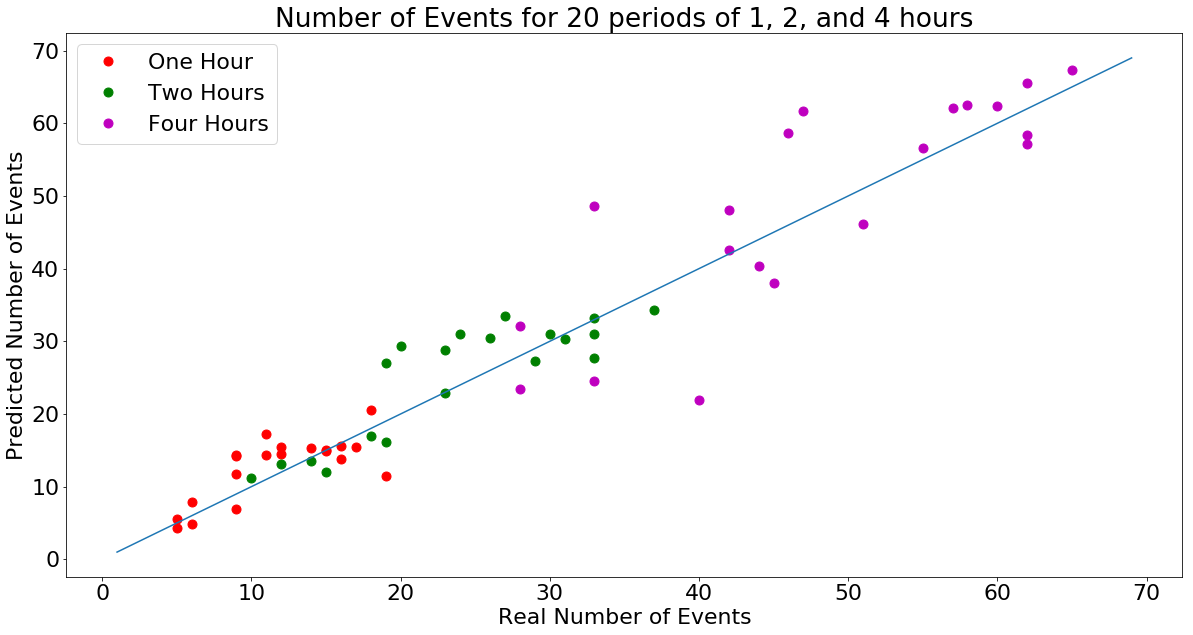

In [74]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(real_num_1h, pred_num_1h, 'r.', label = "One Hour", markersize=18)
plt.plot(real_num_2h, pred_num_2h, 'g.', label = "Two Hours", markersize=18)
plt.plot(real_num_4h, pred_num_4h, 'm.', label = "Four Hours", markersize=18)
plt.xlabel('Real Number of Events')
plt.ylabel('Predicted Number of Events')
plt.legend()
plt.title('Number of Events for 20 periods of 1, 2, and 4 hours')
x = np.arange(1, 70)
plt.plot(x, x)
#plt.plot(real_nm_24h, pred_num_24h, 'b.')


In [ ]:
labels['1Hr Real #', '1Hr Pred #', '1Hr PAI',
      '2Hr Real #', '2Hr Pred #', '2Hr PAI',
      '4Hr Real #', '4Hr Pred #', '4Hr PAI']
x_post = np.arange(len(labels))
CTEs = [np.mean(real_num_1h), np.mean(pred_num_1h), np.mean(pai_1h),
       np.mean(real_num_2h), np.mean(pred_num_2h), np.mean(pai_2h),
       np.mean(real_num_4h), np.mean(pred_num_4h), np.mean(pai_4h),]

error = 

#### What about peak time detection?

In [19]:
simulation = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
simulation._LastTime

last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*2: # 2 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_2h = []
real_num_2h = []
pai_2h = []
for i in range(0, 200):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_2h.append(sum(sum(pred)))
    real_num_2h.append(sum(sum(real)))
    pai_2h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs('for_results.csv')


Predicting over time of 0.0817710165 days. Generating 8 intensity prediction(s)
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.003

The predicted number of events is: 11.182659076952838

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.08717363020866098, Real: 0.0
Grid: (40, 48), Model: 0.05923306116794418, Real: 0.0
Grid: (39, 46), Model: 0.05284134565209184, Real: 0.0
Grid: (38, 44), Model: 0.0499080385130347, Real: 0.0
Grid: (38, 53), Model: 0.046358590608987775, Real: 0.0
Grid: (38, 46), Model: 0.04336930360801025, Real: 0.0
Grid: (38, 45), Model: 0.043094898814268444, Real: 0.0
Grid: (38, 47), Model: 0.0409369871939244, Real: 0.0
Grid: (39, 64), Model: 0.03943985671336276, Real: 0.0
Grid: (48, 50), Model: 0.03567174953617454, Real: 0.0
Grid: (64, 65), Model: 0.035658239953030975, Real: 0.0
Grid: (41, 46), Model: 0.03372709015596007, Real: 0.0
Grid: (58, 52), Model: 0.0


Predicting over time of 0.0826969445 days. Generating 8 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 27.777777777777775. 
Hit number/Tot number: 0.08333333333333333. Hit area/Tot area: 0.003

The predicted number of events is: 31.0696841568081

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.24102651935216243, Real: 1.0
Grid: (10, 66), Model: 0.07231428247803935, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.16376535300765185, Real: 0.0
Grid: (39, 46), Model: 0.14786848686441126, Real: 0.0
Grid: (38, 44), Model: 0.1380202455174703, Real: 0.0
Grid: (38, 53), Model: 0.1299505729359586, Real: 0.0
Grid: (38, 46), Model: 0.12080237860377126, Real: 0.0
Grid: (38, 45), Model: 0.11915895967477567, Real: 0.0
Grid: (38, 47), Model: 0.11408253938844415, Real: 0.0
Grid: (39, 64), Model: 0.10993698464390812, Real: 0.0
Grid: (64, 65), Model: 0.10039275070519822, Real: 0.0
Grid: (48, 50), Model: 0.09862307468353103, Real: 0.0



Predicting over time of 0.0795256411 days. Generating 8 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 10.1010101010101. 
Hit number/Tot number: 0.030303030303030304. Hit area/Tot area: 0.003

The predicted number of events is: 27.738447219291103

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.2183275408778655, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.14562997742897163, Real: 0.0
Grid: (39, 46), Model: 0.13227387039790742, Real: 0.0
Grid: (38, 44), Model: 0.12276389554543833, Real: 0.0
Grid: (38, 53), Model: 0.1155522609860629, Real: 0.0
Grid: (38, 46), Model: 0.10742787842723739, Real: 0.0
Grid: (38, 45), Model: 0.1059723302209395, Real: 0.0
Grid: (38, 47), Model: 0.10144717457427085, Real: 0.0
Grid: (39, 64), Model: 0.09776673719657894, Real: 0.0
Grid: (64, 65), Model: 0.08929194758106285, Real: 0.0
Grid: (48, 50), Model: 0.08849399815244578, Real: 0.0
Grid: (41, 46), Model: 0.08456082077096275, Real: 0.0



Predicting over time of 0.07236127319999999 days. Generating 7 intensity prediction(s)
3.0

The predictive accuracy index for 30 hotspots is: 38.46153846153846. 
Hit number/Tot number: 0.11538461538461539. Hit area/Tot area: 0.003

The predicted number of events is: 25.29312535334929

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.20019397022153343, Real: 1.0
Grid: (38, 44), Model: 0.11137402400606151, Real: 1.0
Grid: (39, 47), Model: 0.06562157943855763, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.13282102279500616, Real: 0.0
Grid: (39, 46), Model: 0.122871645507553, Real: 0.0
Grid: (38, 53), Model: 0.10480650527756367, Real: 0.0
Grid: (38, 45), Model: 0.09831044645408835, Real: 0.0
Grid: (38, 46), Model: 0.09744513576902963, Real: 0.0
Grid: (38, 47), Model: 0.09201666341903977, Real: 0.0
Grid: (39, 64), Model: 0.09013959076752251, Real: 0.0
Grid: (64, 65), Model: 0.08100484302100369, Real: 0.0
Grid: (48, 50), Model: 0.08026429113918551, Rea


Predicting over time of 0.0746413709 days. Generating 8 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 11.494252873563218. 
Hit number/Tot number: 0.034482758620689655. Hit area/Tot area: 0.003

The predicted number of events is: 30.966011525237622

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.2456892056566152, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.1618538589716, Real: 0.0
Grid: (39, 46), Model: 0.1505768616141987, Real: 0.0
Grid: (38, 44), Model: 0.13841017545729387, Real: 0.0
Grid: (38, 53), Model: 0.1277122731697497, Real: 0.0
Grid: (38, 45), Model: 0.119795783144818, Real: 0.0
Grid: (38, 46), Model: 0.1187529940040411, Real: 0.0
Grid: (38, 47), Model: 0.1130154517109364, Real: 0.0
Grid: (39, 64), Model: 0.10983933769144459, Real: 0.0
Grid: (64, 65), Model: 0.09961597867883958, Real: 0.0
Grid: (48, 50), Model: 0.0986933540701698, Real: 0.0
Grid: (41, 46), Model: 0.09439058031201349, Real: 0.0
Grid: (


Predicting over time of 0.0777085074 days. Generating 8 intensity prediction(s)
6.0

The predictive accuracy index for 30 hotspots is: 83.33333333333333. 
Hit number/Tot number: 0.25. Hit area/Tot area: 0.003

The predicted number of events is: 11.277576333582513

Predicted hotspots in real top 30
Grid: (38, 44), Model: 0.05203724909875613, Real: 2.0
Grid: (38, 46), Model: 0.04331754282057781, Real: 1.0
Grid: (64, 65), Model: 0.03607189208398735, Real: 2.0
Grid: (47, 50), Model: 0.023047260545605058, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.08925893132615445, Real: 0.0
Grid: (40, 48), Model: 0.05923799562703246, Real: 0.0
Grid: (39, 46), Model: 0.054502559222053173, Real: 0.0
Grid: (38, 53), Model: 0.04623766065504391, Real: 0.0
Grid: (38, 45), Model: 0.044330743811834994, Real: 0.0
Grid: (38, 47), Model: 0.04155418913142405, Real: 0.0
Grid: (39, 64), Model: 0.03976668430865116, Real: 0.0
Grid: (48, 50), Model: 0.03604662650252345, Real: 0.0
Grid: (41

1.0

The predictive accuracy index for 30 hotspots is: 13.333333333333334. 
Hit number/Tot number: 0.04. Hit area/Tot area: 0.003

The predicted number of events is: 28.189965931017955

Predicted hotspots in real top 30
Grid: (47, 4), Model: 0.07095041109886129, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.22240089248560974, Real: 0.0
Grid: (40, 48), Model: 0.1476112346509549, Real: 0.0
Grid: (39, 46), Model: 0.13579171514525915, Real: 0.0
Grid: (38, 44), Model: 0.13126297425473876, Real: 0.0
Grid: (38, 53), Model: 0.11522030701146152, Real: 0.0
Grid: (38, 45), Model: 0.11045641975607559, Real: 0.0
Grid: (38, 46), Model: 0.10874933159153276, Real: 0.0
Grid: (38, 47), Model: 0.10354146930125849, Real: 0.0
Grid: (39, 64), Model: 0.0990949300941083, Real: 0.0
Grid: (64, 65), Model: 0.09149570283651413, Real: 0.0
Grid: (48, 50), Model: 0.0906174064727658, Real: 0.0
Grid: (41, 46), Model: 0.08518356192747807, Real: 0.0
Grid: (58, 52), Model: 0.08439416596918223


Predicting over time of 0.0826737963 days. Generating 8 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 12.820512820512821. 
Hit number/Tot number: 0.038461538461538464. Hit area/Tot area: 0.003

The predicted number of events is: 25.970803756027163

Predicted hotspots in real top 30
Grid: (38, 46), Model: 0.100622085158592, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.20424425333717877, Real: 0.0
Grid: (40, 48), Model: 0.13556819399745246, Real: 0.0
Grid: (39, 46), Model: 0.12469975246555118, Real: 0.0
Grid: (38, 44), Model: 0.12128826061808164, Real: 0.0
Grid: (38, 53), Model: 0.10656529295124054, Real: 0.0
Grid: (38, 45), Model: 0.10143900625135016, Real: 0.0
Grid: (38, 47), Model: 0.09509077496227411, Real: 0.0
Grid: (39, 64), Model: 0.09101216090023588, Real: 0.0
Grid: (64, 65), Model: 0.08403550804050913, Real: 0.0
Grid: (48, 50), Model: 0.08396350592337697, Real: 0.0
Grid: (41, 46), Model: 0.0782429592973569, Real: 0.

7.0

The predictive accuracy index for 30 hotspots is: 49.645390070921984. 
Hit number/Tot number: 0.14893617021276595. Hit area/Tot area: 0.003

The predicted number of events is: 28.409392096893495

Predicted hotspots in real top 30
Grid: (38, 53), Model: 0.11696444526227513, Real: 1.0
Grid: (38, 47), Model: 0.10444236963010639, Real: 1.0
Grid: (39, 64), Model: 0.0991956776171757, Real: 1.0
Grid: (49, 48), Model: 0.07449893580066497, Real: 1.0
Grid: (39, 47), Model: 0.07303252420337805, Real: 2.0
Grid: (39, 50), Model: 0.07228287711738704, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.22340219343847134, Real: 0.0
Grid: (40, 48), Model: 0.14856282732086484, Real: 0.0
Grid: (39, 46), Model: 0.13588476437657943, Real: 0.0
Grid: (38, 44), Model: 0.13216915561102996, Real: 0.0
Grid: (38, 45), Model: 0.11054636050556228, Real: 0.0
Grid: (38, 46), Model: 0.11047389981679745, Real: 0.0
Grid: (64, 65), Model: 0.0915963904467739, Real: 0.0
Grid: (48, 50), Model: 0.


Predicting over time of 0.0780904527 days. Generating 8 intensity prediction(s)
3.0

The predictive accuracy index for 30 hotspots is: 30.303030303030305. 
Hit number/Tot number: 0.09090909090909091. Hit area/Tot area: 0.003

The predicted number of events is: 26.19347790225796

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.20559936558990616, Real: 1.0
Grid: (49, 48), Model: 0.0690931496264508, Real: 1.0
Grid: (39, 50), Model: 0.0670339133346488, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.13623485448528527, Real: 0.0
Grid: (39, 46), Model: 0.12534317767843273, Real: 0.0
Grid: (38, 44), Model: 0.12119039890776438, Real: 0.0
Grid: (38, 53), Model: 0.10800943289617702, Real: 0.0
Grid: (38, 45), Model: 0.101368679802485, Real: 0.0
Grid: (38, 46), Model: 0.10130454029250187, Real: 0.0
Grid: (38, 47), Model: 0.09802145183882163, Real: 0.0
Grid: (39, 64), Model: 0.09247783502035238, Real: 0.0
Grid: (64, 65), Model: 0.08474993629569809, Real: 0.0
G

3.0

The predictive accuracy index for 30 hotspots is: 34.48275862068965. 
Hit number/Tot number: 0.10344827586206896. Hit area/Tot area: 0.003

The predicted number of events is: 25.107311095813145

Predicted hotspots in real top 30
Grid: (49, 48), Model: 0.06677964884813911, Real: 1.0
Grid: (39, 49), Model: 0.06671101785803828, Real: 1.0
Grid: (16, 64), Model: 0.0597020630034141, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.19722970882346805, Real: 0.0
Grid: (40, 48), Model: 0.1302265260801946, Real: 0.0
Grid: (39, 46), Model: 0.12050804571413996, Real: 0.0
Grid: (38, 44), Model: 0.1158338743520658, Real: 0.0
Grid: (38, 53), Model: 0.1032409966544411, Real: 0.0
Grid: (38, 46), Model: 0.09754392833723143, Real: 0.0
Grid: (38, 45), Model: 0.09689343580601392, Real: 0.0
Grid: (38, 47), Model: 0.09439372760406883, Real: 0.0
Grid: (39, 64), Model: 0.08839678223845038, Real: 0.0
Grid: (64, 65), Model: 0.08101654857192872, Real: 0.0
Grid: (48, 50), Model: 0.080


Predicting over time of 0.0798381418 days. Generating 8 intensity prediction(s)
4.0

The predictive accuracy index for 30 hotspots is: 40.4040404040404. 
Hit number/Tot number: 0.12121212121212122. Hit area/Tot area: 0.003

The predicted number of events is: 28.08765221865919

Predicted hotspots in real top 30
Grid: (39, 64), Model: 0.09830037855940993, Real: 1.0
Grid: (38, 49), Model: 0.07979358545009228, Real: 1.0
Grid: (10, 66), Model: 0.07093196743040538, Real: 1.0
Grid: (53, 46), Model: 0.05827404611138367, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.22010100055271342, Real: 0.0
Grid: (40, 48), Model: 0.14482097222940252, Real: 0.0
Grid: (39, 46), Model: 0.1355751301287938, Real: 0.0
Grid: (38, 44), Model: 0.12880133947521108, Real: 0.0
Grid: (38, 53), Model: 0.1179486332898183, Real: 0.0
Grid: (38, 46), Model: 0.10925755602173325, Real: 0.0
Grid: (38, 45), Model: 0.10854201266197544, Real: 0.0
Grid: (38, 47), Model: 0.10494900692722936, Real: 0.0
G


Predicting over time of 0.082407592 days. Generating 8 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 18.01801801801802. 
Hit number/Tot number: 0.05405405405405406. Hit area/Tot area: 0.003

The predicted number of events is: 30.74571545361179

Predicted hotspots in real top 30
Grid: (48, 50), Model: 0.09881319009289888, Real: 1.0
Grid: (39, 50), Model: 0.07844752270938986, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.24141563187477172, Real: 0.0
Grid: (40, 48), Model: 0.15774316880365524, Real: 0.0
Grid: (39, 46), Model: 0.1493434705837889, Real: 0.0
Grid: (38, 44), Model: 0.14112764542345282, Real: 0.0
Grid: (38, 53), Model: 0.12930423501493832, Real: 0.0
Grid: (38, 46), Model: 0.11985143472225808, Real: 0.0
Grid: (38, 45), Model: 0.11821443071268753, Real: 0.0
Grid: (38, 47), Model: 0.11428404345512522, Real: 0.0
Grid: (39, 64), Model: 0.10793054964829119, Real: 0.0
Grid: (64, 65), Model: 0.09987815886316295, Real: 0.0



Predicting over time of 0.0793520296 days. Generating 8 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 13.333333333333334. 
Hit number/Tot number: 0.04. Hit area/Tot area: 0.003

The predicted number of events is: 19.74917430931378

Predicted hotspots in real top 30
Grid: (48, 50), Model: 0.06531545967263744, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.15412586191629524, Real: 0.0
Grid: (40, 48), Model: 0.10128089657473259, Real: 0.0
Grid: (39, 46), Model: 0.09589419249218888, Real: 0.0
Grid: (38, 44), Model: 0.09122297917485192, Real: 0.0
Grid: (38, 53), Model: 0.08366220705060486, Real: 0.0
Grid: (38, 45), Model: 0.07658937016665011, Real: 0.0
Grid: (38, 46), Model: 0.0765180980617421, Real: 0.0
Grid: (38, 47), Model: 0.07351259349882261, Real: 0.0
Grid: (39, 64), Model: 0.06891165639575073, Real: 0.0
Grid: (64, 65), Model: 0.06377225320259536, Real: 0.0
Grid: (41, 46), Model: 0.05950422713988786, Real: 0.0
Grid: (58, 52


Predicting over time of 0.0832525013 days. Generating 8 intensity prediction(s)
4.0

The predictive accuracy index for 30 hotspots is: 30.303030303030305. 
Hit number/Tot number: 0.09090909090909091. Hit area/Tot area: 0.003

The predicted number of events is: 31.617406665315293

Predicted hotspots in real top 30
Grid: (38, 49), Model: 0.08928484162756864, Real: 1.0
Grid: (49, 48), Model: 0.08500621602381421, Real: 2.0
Grid: (47, 4), Model: 0.08200018692198775, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.24718126781520783, Real: 0.0
Grid: (40, 48), Model: 0.16126722725595816, Real: 0.0
Grid: (39, 46), Model: 0.1535365907954701, Real: 0.0
Grid: (38, 44), Model: 0.14522282481417145, Real: 0.0
Grid: (38, 53), Model: 0.1349841126068346, Real: 0.0
Grid: (38, 45), Model: 0.12193170301216895, Real: 0.0
Grid: (38, 46), Model: 0.1218228620410621, Real: 0.0
Grid: (38, 47), Model: 0.11792413720311229, Real: 0.0
Grid: (39, 64), Model: 0.10972119878197692, Real: 0.0



Predicting over time of 0.081944628 days. Generating 8 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 44.44444444444444. 
Hit number/Tot number: 0.13333333333333333. Hit area/Tot area: 0.003

The predicted number of events is: 12.922042159308445

Predicted hotspots in real top 30
Grid: (38, 47), Model: 0.04789222896457396, Real: 1.0
Grid: (44, 46), Model: 0.029571062098570404, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.10187128811777252, Real: 0.0
Grid: (40, 48), Model: 0.06588279742669235, Real: 0.0
Grid: (39, 46), Model: 0.0634566201188772, Real: 0.0
Grid: (38, 44), Model: 0.05935537610050029, Real: 0.0
Grid: (38, 53), Model: 0.054817087135306405, Real: 0.0
Grid: (38, 45), Model: 0.04989683439090335, Real: 0.0
Grid: (38, 46), Model: 0.04985012555808579, Real: 0.0
Grid: (39, 64), Model: 0.04457023951517364, Real: 0.0
Grid: (48, 50), Model: 0.04257776399337375, Real: 0.0
Grid: (64, 65), Model: 0.042349740721679456, Real: 


Predicting over time of 0.0781136009 days. Generating 8 intensity prediction(s)
4.0

The predictive accuracy index for 30 hotspots is: 33.333333333333336. 
Hit number/Tot number: 0.1. Hit area/Tot area: 0.003

The predicted number of events is: 32.87668779283825

Predicted hotspots in real top 30
Grid: (39, 64), Model: 0.11278591764552093, Real: 1.0
Grid: (41, 46), Model: 0.09834714240836077, Real: 1.0
Grid: (38, 49), Model: 0.0945627269573715, Real: 1.0
Grid: (39, 49), Model: 0.087373525405748, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.2624087890052008, Real: 0.0
Grid: (40, 48), Model: 0.16765611320774843, Real: 0.0
Grid: (39, 46), Model: 0.16237884362206992, Real: 0.0
Grid: (38, 44), Model: 0.15109486283051898, Real: 0.0
Grid: (38, 53), Model: 0.14055077033227537, Real: 0.0
Grid: (38, 45), Model: 0.12716845564290596, Real: 0.0
Grid: (38, 46), Model: 0.1261313565047675, Real: 0.0
Grid: (38, 47), Model: 0.1230386942676226, Real: 0.0
Grid: (64, 65), Mod


Predicting over time of 0.0825696294 days. Generating 8 intensity prediction(s)
3.0

The predictive accuracy index for 30 hotspots is: 45.45454545454545. 
Hit number/Tot number: 0.13636363636363635. Hit area/Tot area: 0.003

The predicted number of events is: 20.209971063525096

Predicted hotspots in real top 30
Grid: (58, 52), Model: 0.05956882594704438, Real: 2.0
Grid: (47, 3), Model: 0.0450610555441314, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.1604628507516167, Real: 0.0
Grid: (40, 48), Model: 0.10312129191327205, Real: 0.0
Grid: (39, 46), Model: 0.09928014430859639, Real: 0.0
Grid: (38, 44), Model: 0.09354401544231758, Real: 0.0
Grid: (38, 53), Model: 0.08594180370150784, Real: 0.0
Grid: (38, 45), Model: 0.07777510554545804, Real: 0.0
Grid: (38, 46), Model: 0.07714731141907842, Real: 0.0
Grid: (38, 47), Model: 0.0763793608752357, Real: 0.0
Grid: (39, 64), Model: 0.0695653876741078, Real: 0.0
Grid: (64, 65), Model: 0.06781369579263782, Real: 0.0
Gr


Predicting over time of 0.0780557304 days. Generating 8 intensity prediction(s)
6.0

The predictive accuracy index for 30 hotspots is: 68.9655172413793. 
Hit number/Tot number: 0.20689655172413793. Hit area/Tot area: 0.003

The predicted number of events is: 24.15404754116139

Predicted hotspots in real top 30
Grid: (38, 53), Model: 0.10214241399192252, Real: 1.0
Grid: (48, 50), Model: 0.08030292040515304, Real: 2.0
Grid: (39, 49), Model: 0.06426402649363153, Real: 1.0
Grid: (39, 50), Model: 0.061567254433450166, Real: 1.0
Grid: (47, 3), Model: 0.05562210310890072, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.19208442241283957, Real: 0.0
Grid: (40, 48), Model: 0.12327888215733726, Real: 0.0
Grid: (39, 46), Model: 0.11934661145332565, Real: 0.0
Grid: (38, 44), Model: 0.11118941645224903, Real: 0.0
Grid: (38, 46), Model: 0.0930790237875917, Real: 0.0
Grid: (38, 45), Model: 0.09245480261927205, Real: 0.0
Grid: (38, 47), Model: 0.09077477012144033, Real: 0.0



Predicting over time of 0.0828126855 days. Generating 8 intensity prediction(s)
5.0

The predictive accuracy index for 30 hotspots is: 45.04504504504504. 
Hit number/Tot number: 0.13513513513513514. Hit area/Tot area: 0.003

The predicted number of events is: 29.038894951859763

Predicted hotspots in real top 30
Grid: (39, 46), Model: 0.14446405423621977, Real: 1.0
Grid: (16, 64), Model: 0.06747379097107169, Real: 2.0
Grid: (47, 3), Model: 0.06740364994906817, Real: 1.0
Grid: (44, 46), Model: 0.0659390978255157, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.22989054692754526, Real: 0.0
Grid: (40, 48), Model: 0.14922236845557046, Real: 0.0
Grid: (38, 44), Model: 0.13636027768324138, Real: 0.0
Grid: (38, 53), Model: 0.1230609156180262, Real: 0.0
Grid: (38, 45), Model: 0.11148662726295196, Real: 0.0
Grid: (38, 46), Model: 0.11141787747158552, Real: 0.0
Grid: (38, 47), Model: 0.10946498422078094, Real: 0.0
Grid: (39, 64), Model: 0.09983980098721593, Real: 0.0



Predicting over time of 0.0824654625 days. Generating 8 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 19.6078431372549. 
Hit number/Tot number: 0.058823529411764705. Hit area/Tot area: 0.003

The predicted number of events is: 14.319818909085564

Predicted hotspots in real top 30
Grid: (41, 46), Model: 0.04361802148378164, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.11401298702432226, Real: 0.0
Grid: (40, 48), Model: 0.07363254492135067, Real: 0.0
Grid: (39, 46), Model: 0.07126752330994077, Real: 0.0
Grid: (38, 44), Model: 0.06689590018066875, Real: 0.0
Grid: (38, 53), Model: 0.060371812717098926, Real: 0.0
Grid: (38, 45), Model: 0.05511299820884938, Real: 0.0
Grid: (38, 46), Model: 0.05467019365368726, Real: 0.0
Grid: (38, 47), Model: 0.05410955209113631, Real: 0.0
Grid: (39, 64), Model: 0.048993233500654466, Real: 0.0
Grid: (48, 50), Model: 0.04833766787941983, Real: 0.0
Grid: (64, 65), Model: 0.04813702301973977, Real:


Predicting over time of 0.0812617561 days. Generating 8 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 21.50537634408602. 
Hit number/Tot number: 0.06451612903225806. Hit area/Tot area: 0.003

The predicted number of events is: 33.812616449565624

Predicted hotspots in real top 30
Grid: (40, 48), Model: 0.17297676162941128, Real: 1.0
Grid: (44, 46), Model: 0.07696653686053141, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.27066857900939645, Real: 0.0
Grid: (39, 46), Model: 0.1673504683558587, Real: 0.0
Grid: (38, 44), Model: 0.15711676698677435, Real: 0.0
Grid: (38, 53), Model: 0.14179468418143942, Real: 0.0
Grid: (38, 46), Model: 0.13132252357535695, Real: 0.0
Grid: (38, 45), Model: 0.12946062924975257, Real: 0.0
Grid: (38, 47), Model: 0.12804271979967205, Real: 0.0
Grid: (39, 64), Model: 0.11606384496649053, Real: 0.0
Grid: (48, 50), Model: 0.11350299699934133, Real: 0.0
Grid: (64, 65), Model: 0.11305703916283949, Real: 0.


Predicting over time of 0.0832293531 days. Generating 8 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 35.08771929824561. 
Hit number/Tot number: 0.10526315789473684. Hit area/Tot area: 0.003

The predicted number of events is: 13.580968019363018

Predicted hotspots in real top 30
Grid: (38, 45), Model: 0.05173449696755145, Real: 1.0
Grid: (44, 46), Model: 0.031142993968591, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.10852480179721687, Real: 0.0
Grid: (40, 48), Model: 0.06951397898730785, Real: 0.0
Grid: (39, 46), Model: 0.06685349996069728, Real: 0.0
Grid: (38, 44), Model: 0.06316394059420871, Real: 0.0
Grid: (38, 53), Model: 0.057422897863627836, Real: 0.0
Grid: (38, 46), Model: 0.05247512223334403, Real: 0.0
Grid: (38, 47), Model: 0.0511547693152638, Real: 0.0
Grid: (39, 64), Model: 0.046771930053333965, Real: 0.0
Grid: (48, 50), Model: 0.045341014855842354, Real: 0.0
Grid: (64, 65), Model: 0.04517273201825647, Real: 0

6.0

The predictive accuracy index for 30 hotspots is: 64.51612903225806. 
Hit number/Tot number: 0.1935483870967742. Hit area/Tot area: 0.003

The predicted number of events is: 32.33781490205743

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.2597680949226296, Real: 1.0
Grid: (38, 45), Model: 0.12345988189043838, Real: 1.0
Grid: (49, 48), Model: 0.09002560152210956, Real: 1.0
Grid: (39, 47), Model: 0.08142128061819606, Real: 1.0
Grid: (38, 56), Model: 0.07506458366556842, Real: 1.0
Grid: (53, 50), Model: 0.07055447307679268, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.16649932386425823, Real: 0.0
Grid: (39, 46), Model: 0.15923652138225777, Real: 0.0
Grid: (38, 44), Model: 0.15143271787740725, Real: 0.0
Grid: (38, 53), Model: 0.13965010553590118, Real: 0.0
Grid: (38, 46), Model: 0.12429448269543723, Real: 0.0
Grid: (38, 47), Model: 0.12114795563410784, Real: 0.0
Grid: (39, 64), Model: 0.11263408208358033, Real: 0.0
Grid: (64, 65), Model: 0.10

1.0

The predictive accuracy index for 30 hotspots is: 12.820512820512821. 
Hit number/Tot number: 0.038461538461538464. Hit area/Tot area: 0.003

The predicted number of events is: 25.944861338304513

Predicted hotspots in real top 30
Grid: (38, 44), Model: 0.1209507727403362, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.20820176465534163, Real: 0.0
Grid: (40, 48), Model: 0.1330142148590565, Real: 0.0
Grid: (39, 46), Model: 0.12716856462634302, Real: 0.0
Grid: (38, 53), Model: 0.11226172412783614, Real: 0.0
Grid: (38, 46), Model: 0.10150307439577096, Real: 0.0
Grid: (38, 45), Model: 0.09936229790821621, Real: 0.0
Grid: (38, 47), Model: 0.0974889534667916, Real: 0.0
Grid: (39, 64), Model: 0.08998089820969887, Real: 0.0
Grid: (64, 65), Model: 0.0869171895920178, Real: 0.0
Grid: (48, 50), Model: 0.08574756843165261, Real: 0.0
Grid: (41, 46), Model: 0.07895322072813517, Real: 0.0
Grid: (58, 52), Model: 0.07746086571022219, Real: 0.0
Grid: (38, 49), Model: 0.0


Predicting over time of 0.0798381418 days. Generating 8 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 15.873015873015872. 
Hit number/Tot number: 0.047619047619047616. Hit area/Tot area: 0.003

The predicted number of events is: 27.00675816427726

Predicted hotspots in real top 30
Grid: (37, 45), Model: 0.05680045373875381, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.21614409620925834, Real: 0.0
Grid: (40, 48), Model: 0.13839524999242084, Real: 0.0
Grid: (39, 46), Model: 0.13382617244132614, Real: 0.0
Grid: (38, 44), Model: 0.12664016858275468, Real: 0.0
Grid: (38, 53), Model: 0.11764470066142865, Real: 0.0
Grid: (38, 46), Model: 0.10501542857722096, Real: 0.0
Grid: (38, 45), Model: 0.10280996531666867, Real: 0.0
Grid: (38, 47), Model: 0.10085477489009512, Real: 0.0
Grid: (39, 64), Model: 0.09310727807672216, Real: 0.0
Grid: (64, 65), Model: 0.08992168775621773, Real: 0.0
Grid: (48, 50), Model: 0.08946800011765696, Real: 


Predicting over time of 0.0816205532 days. Generating 8 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 26.666666666666668. 
Hit number/Tot number: 0.08. Hit area/Tot area: 0.003

The predicted number of events is: 32.41283275307529

Predicted hotspots in real top 30
Grid: (38, 46), Model: 0.12724525861742972, Real: 1.0
Grid: (44, 46), Model: 0.07733249231347797, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.2590766948608749, Real: 0.0
Grid: (40, 48), Model: 0.16535604382039404, Real: 0.0
Grid: (39, 46), Model: 0.16074569089496188, Real: 0.0
Grid: (38, 44), Model: 0.15217315057097247, Real: 0.0
Grid: (38, 53), Model: 0.14050541750158443, Real: 0.0
Grid: (38, 45), Model: 0.12373270893391392, Real: 0.0
Grid: (38, 47), Model: 0.12047586675228845, Real: 0.0
Grid: (39, 64), Model: 0.11124838667480719, Real: 0.0
Grid: (64, 65), Model: 0.10832077316690564, Real: 0.0
Grid: (48, 50), Model: 0.10686200812267188, Real: 0.0
Grid: (41, 46


Predicting over time of 0.0786807318 days. Generating 8 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 16.666666666666668. 
Hit number/Tot number: 0.05. Hit area/Tot area: 0.003

The predicted number of events is: 13.502362070329855

Predicted hotspots in real top 30
Grid: (58, 52), Model: 0.04004370768966308, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.10806064821286976, Real: 0.0
Grid: (40, 48), Model: 0.06926731550397171, Real: 0.0
Grid: (39, 46), Model: 0.06694551840104797, Real: 0.0
Grid: (38, 44), Model: 0.06302494011722848, Real: 0.0
Grid: (38, 53), Model: 0.05818542386532278, Real: 0.0
Grid: (38, 46), Model: 0.05346350251600989, Real: 0.0
Grid: (38, 45), Model: 0.051256192645457645, Real: 0.0
Grid: (38, 47), Model: 0.04990010472738812, Real: 0.0
Grid: (39, 64), Model: 0.047227268111800155, Real: 0.0
Grid: (64, 65), Model: 0.04486528051001751, Real: 0.0
Grid: (48, 50), Model: 0.04425661020845408, Real: 0.0
Grid: (41

4.0

The predictive accuracy index for 30 hotspots is: 31.007751937984494. 
Hit number/Tot number: 0.09302325581395349. Hit area/Tot area: 0.003

The predicted number of events is: 36.351882705815655

Predicted hotspots in real top 30
Grid: (39, 46), Model: 0.17947649215290068, Real: 1.0
Grid: (39, 49), Model: 0.0963859907576852, Real: 1.0
Grid: (39, 50), Model: 0.09112938776933788, Real: 1.0
Grid: (10, 66), Model: 0.09001186668267605, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.2897354143976355, Real: 0.0
Grid: (40, 48), Model: 0.18575994434288798, Real: 0.0
Grid: (38, 44), Model: 0.1689904502429112, Real: 0.0
Grid: (38, 53), Model: 0.15703225651628053, Real: 0.0
Grid: (38, 46), Model: 0.14334904387539438, Real: 0.0
Grid: (38, 45), Model: 0.1374580553863885, Real: 0.0
Grid: (38, 47), Model: 0.1338055469111066, Real: 0.0
Grid: (39, 64), Model: 0.12664674008531923, Real: 0.0
Grid: (64, 65), Model: 0.12237850714395182, Real: 0.0
Grid: (48, 50), Model: 0.118


Predicting over time of 0.0818404611 days. Generating 8 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 19.6078431372549. 
Hit number/Tot number: 0.058823529411764705. Hit area/Tot area: 0.003

The predicted number of events is: 20.386715427804507

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.1619795137505901, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.10350730234204807, Real: 0.0
Grid: (39, 46), Model: 0.10053783394436616, Real: 0.0
Grid: (38, 44), Model: 0.0953031200720228, Real: 0.0
Grid: (38, 53), Model: 0.08862573567699515, Real: 0.0
Grid: (38, 46), Model: 0.08043290668164799, Real: 0.0
Grid: (38, 45), Model: 0.07833600510152262, Real: 0.0
Grid: (38, 47), Model: 0.07454646879067199, Real: 0.0
Grid: (39, 64), Model: 0.07056413092388018, Real: 0.0
Grid: (64, 65), Model: 0.06817115246125023, Real: 0.0
Grid: (48, 50), Model: 0.06668175533479605, Real: 0.0
Grid: (41, 46), Model: 0.06273586212374335, Real: 0.0


Predicting over time of 0.0779862858 days. Generating 8 intensity prediction(s)
3.0

The predictive accuracy index for 30 hotspots is: 33.333333333333336. 
Hit number/Tot number: 0.1. Hit area/Tot area: 0.003

The predicted number of events is: 23.569918123942973

Predicted hotspots in real top 30
Grid: (38, 44), Model: 0.10960186185016549, Real: 1.0
Grid: (38, 45), Model: 0.09009975573112389, Real: 1.0
Grid: (49, 48), Model: 0.06846770442843315, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.186950599617524, Real: 0.0
Grid: (40, 48), Model: 0.12040434100140475, Real: 0.0
Grid: (39, 46), Model: 0.1156081731608875, Real: 0.0
Grid: (38, 53), Model: 0.10190642500686038, Real: 0.0
Grid: (38, 46), Model: 0.0925006046700414, Real: 0.0
Grid: (38, 47), Model: 0.08574258225728966, Real: 0.0
Grid: (39, 64), Model: 0.0811680511919329, Real: 0.0
Grid: (64, 65), Model: 0.07840093023984243, Real: 0.0
Grid: (48, 50), Model: 0.07734876569084255, Real: 0.0
Grid: (41, 46), M

In [20]:
pred_num_2h = array(pred_num_2h)
real_num_2h = array(real_num_2h)

In [25]:
np.percentile(real_num_2h, 70), np.percentile(pred_num_2h, 70)

(31.0, 30.454987547994357)

In [30]:
pred = pred_num_2h - np.percentile(pred_num_2h, 70)
neg_indx = pred < 0
pred[neg_indx] = 0
pos_indx = pred > 0
pred[pos_indx] = 1


real = real_num_2h - np.percentile(pred_num_2h, 70)
neg_indx = real < 0
real[neg_indx] = 0
pos_indx = real > 0
real[pos_indx] = 1
pred, real

(array([0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        1., 1., 0., 0., 0.

In [34]:
import sklearn.metrics

sklearn.metrics.roc_auc_score(pred, real)

0.780952380952381

In [27]:
num_events_in_top_percentile = 0
false_neg = 0
true_neg = 0
false_pos = 0
true_pos = 0

for i in range(0, len(real)):
    if real[i]:
        num_events_in_top_percentile += 1
    if real[i] and pred[i]:
        true_pos += 1
    elif real[i] and not pred[i]:
        false_neg += 1
    elif not real[i] and not pred[i]:
        true_neg +=1
    elif not real[i] and pred[i]:
        false_pos +=1
print("\nTot num top percentile events: ")
print(num_events_in_top_percentile)
print('\nTrue pos: ')
print(true_pos)
print("\nFalse neg: ")
print(false_neg)
print("\nFalse pos: ")
print(false_pos)
print("\nTrue neg: ")
print(true_neg)


Tot num top percentile events: 
68

True pos: 
44

False neg: 
24

False pos: 
16

True neg: 
116


In [11]:
16+19

35

In [8]:
200-35

165

In [9]:
19+141

160

In [12]:
16+19

35

In [14]:
24+141

165

In [15]:
35/200

0.175

In [16]:
200*35/200

35.0